**Théophane DELBAUFFE - ESILV DIA4**

# Week 5 - Optimization

> We want to minimize the error function. 
To do so, we use the gradient descent. But,sometimes, the result we get is a local minimum and not a global one.
>> Stochastic & Minibatch Gradient Descent, which use validation set.
>>> If there are too many minima, these methods don't work.


## **Requirements**

In [ ]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import sklearn
from random import seed

## **Wine Quality Dataset**

### EX1

In [ ]:
wine = pd.read_csv('winequality-white.csv',sep=';')
wine = sklearn.utils.shuffle(wine).head(1000)
print(wine.shape)
wine.head()

(1000, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1038,7.1,0.15,0.34,5.3,0.034,33.0,104.0,0.99530,3.37,0.52,9.3,7
1124,9.6,0.23,0.40,1.5,0.044,19.0,135.0,0.99370,2.96,0.49,10.9,5
1403,7.1,0.26,0.31,2.2,0.044,29.0,128.0,0.99370,3.34,0.64,10.9,8
4427,6.3,0.32,0.26,12.3,0.044,24.0,205.0,0.99611,3.11,0.58,9.9,5
1736,6.1,0.22,0.23,3.1,0.052,15.0,104.0,0.99480,3.14,0.42,8.7,5


### EX2

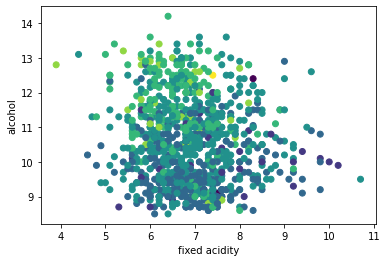

In [ ]:
plt.scatter(wine['fixed acidity'], wine['alcohol'], c = wine['quality'], cmap ='viridis')
plt.xlabel("fixed acidity")
plt.ylabel("alcohol")
plt.show()

## **Effect of Learning Rate and Momentum**

## Learning Rate Dynamics

### EX3

In [ ]:
from tensorflow.keras.utils import to_categorical

X = wine.iloc[:,:11].values
y = wine.iloc[:,-1].values
y = to_categorical(y)

### EX4

> 11 predictors (11 columns for X) 

> 1 target which has been one-hot encoded as a 10 dimensional vectors (10 columns for y)

In [ ]:
n_train = int(0.8 * wine.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

print(trainX.shape,'\n',trainy.shape,'\n\n',testX.shape,'\n',testy.shape)

(800, 11) 
 (800, 10) 

 (200, 11) 
 (200, 10)


### EX5

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(11,)))
model.add(keras.layers.Dense(50, activation ='relu'))
model.add(keras.layers.Dense(10, activation ='softmax'))
model.output_shape

(None, 10)

### EX6

In [ ]:
# compile model
from tensorflow.keras.optimizers import SGD

lrate = 0.8
model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=lrate), 
              metrics=['accuracy'])

### EX7

In [ ]:
# fit model
history = model.fit(trainX, trainy, 
                    validation_data=(testX, testy), 
                    epochs=200, verbose=0)

### EX8

> Blue : Accuracy on the training set

> Red : Accuracy on the test set 

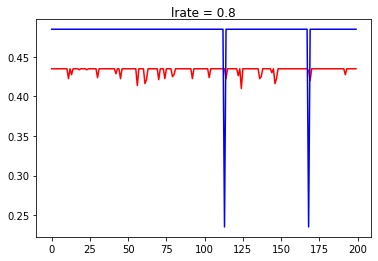

In [ ]:
# plot learning curves
plt.plot(history.history['accuracy'], label ='train ',color = 'r')
plt.plot(history.history['val_accuracy'], label ='test ', color = 'b')
plt.title('lrate = '+ str (lrate), pad = -50)
plt.show()

### EX9

In [ ]:
def fit_model(trainX, trainy, testX, testy, lrate):
  shapeX = trainX.shape[1]
  shapeY = trainy.shape[1]

  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(shapeX,)))
  model.add(keras.layers.Dense(50, activation ='relu'))
  model.add(keras.layers.Dense(shapeY, activation ='softmax'))

  model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=lrate), 
              metrics=['accuracy'])
  
  history = model.fit(trainX, trainy, 
                    validation_data=(testX, testy), 
                    epochs=200, verbose=0)
  
  plt.plot(history.history['accuracy'], label ='train ',color = 'r')
  plt.plot(history.history['val_accuracy'], label ='test ', color = 'b')
  plt.title('lrate = '+ str (lrate), pad = -50)
  plt.show()

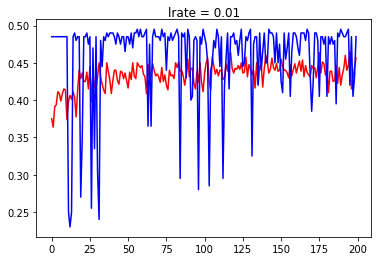

In [ ]:
fit_model(trainX, trainy, testX, testy, 0.01)

### EX10

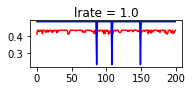

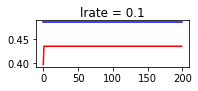

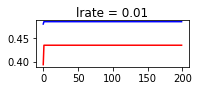

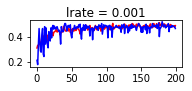

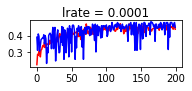

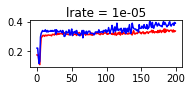

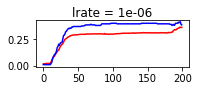

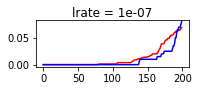

In [ ]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range ( len ( learning_rates )):
  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a learning rate
  fit_model(trainX, trainy, testX, testy, learning_rates[i])
  # show learning curves
  plt.show()

## Momentum Dynamics

### EX11

In [ ]:
def fit_model(trainX, trainy, testX, testy, momentum):
  lrate = 1E-6
  
  shapeX = trainX.shape[1]
  shapeY = trainy.shape[1]

  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(shapeX,)))
  model.add(keras.layers.Dense(50, activation ='relu'))
  model.add(keras.layers.Dense(shapeY, activation ='softmax'))

  model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=lrate, momentum=momentum), 
              metrics=['accuracy'])
  
  history = model.fit(trainX, trainy, 
                    validation_data=(testX, testy), 
                    epochs=200, verbose=0)
  
  plt.plot(history.history['accuracy'], label ='train ',color = 'r')
  plt.plot(history.history['val_accuracy'], label ='test ', color = 'b')
  plt.title('lrate = '+ str(lrate)+' - momentum = '+str(momentum), pad = -50)
  plt.show()

### EX12

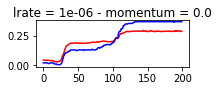

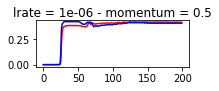

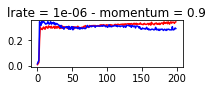

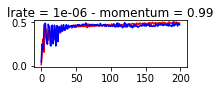

In [ ]:
# create learning curves for different momentum
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a momentum
  fit_model(trainX, trainy, testX, testy, momentums[i])
  # show learning curves
  plt.show()

## Learning Rate Decay

### EX13

In [ ]:
def decay_lrate(initial_rate, decay, iteration):
  return initial_rate * (1.0 / (1.0 + decay * iteration))

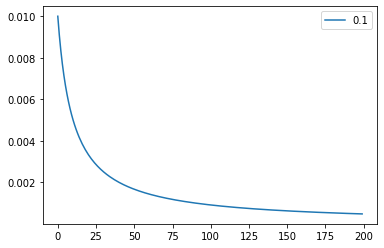

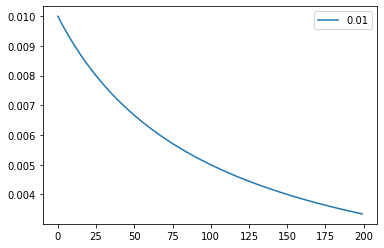

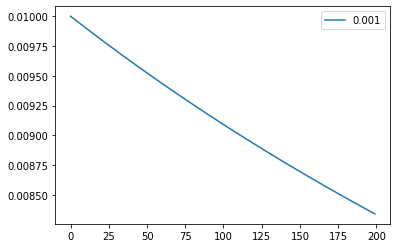

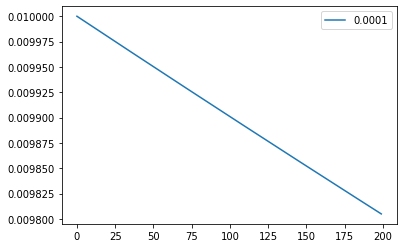

In [ ]:
decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays :
  # calculate learning rates for updates
  lrates = [decay_lrate (lrate , decay , i) for i in range(n_updates)]
  # plot result
  plt.plot(lrates, label = str(decay))
  plt.legend()
  plt.show()

### EX14

In [ ]:
def fit_model(trainX, trainy, testX, testy, decay):
  lrate = 1E-6

  shapeX = trainX.shape[1]
  shapeY = trainy.shape[1]

  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(shapeX,)))
  model.add(keras.layers.Dense(50, activation ='relu'))
  model.add(keras.layers.Dense(shapeY, activation ='softmax'))

  model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=lrate, decay=decay), 
              metrics=['accuracy'])
  
  history = model.fit(trainX, trainy, 
                    validation_data=(testX, testy), 
                    epochs=200, verbose=0)
  
  plt.plot(history.history['accuracy'], label ='train ',color = 'r')
  plt.plot(history.history['val_accuracy'], label ='test ', color = 'b')
  plt.title('lrate = '+ str(lrate)+' - decay = '+str(decay), pad = -50)
  plt.show()

### EX15

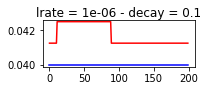

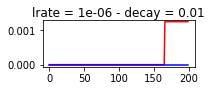

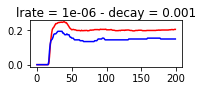

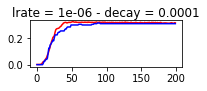

In [ ]:
# create learning curves for different momentum
decays = [1E-1, 1E-2, 1E-3, 1E-4]
for i in range(len(decays)):
  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a decay
  fit_model(trainX, trainy, testX, testy, decays[i])
  # show learning curves
  plt.show()

## **Effect of Adaptative Learning Rate**

### EX16

In [ ]:
def fit_model(trainX, trainy, testX, testy, optimizer):
  lrate = 1E-6

  shapeX = trainX.shape[1]
  shapeY = trainy.shape[1]

  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(shapeX,)))
  model.add(keras.layers.Dense(50, activation ='relu'))
  model.add(keras.layers.Dense(shapeY, activation ='softmax'))

  model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy'])
  
  history = model.fit(trainX, trainy, 
                    validation_data=(testX, testy), 
                    epochs=200, verbose=0)
  
  plt.plot(history.history['accuracy'], label ='train ',color = 'r')
  plt.plot(history.history['val_accuracy'], label ='test ', color = 'b')
  plt.title('optimizer = '+ str(optimizer), pad = -50)
  plt.show()

### EX17

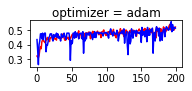

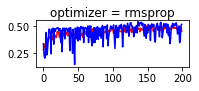

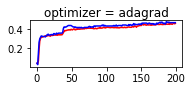

In [ ]:
# create learning curves for different optimizers
optimizers = ['adam', 'rmsprop', 'adagrad']
for i in range(len(optimizers)):
  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a optimizer
  fit_model(trainX, trainy, testX, testy, optimizers[i])
  # show learning curves
  plt.show()

In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adagrad, Adam

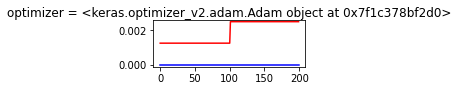

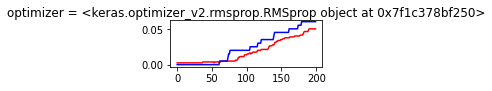

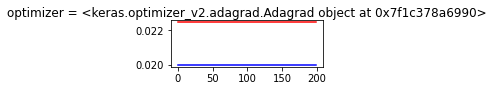

In [ ]:
optimizers = [Adam(learning_rate=1E-6), RMSprop(learning_rate=1E-6), Adagrad(learning_rate=1E-6)]

for i in range(len(optimizers)):
  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a optimizer
  fit_model(trainX, trainy, testX, testy, optimizers[i])
  # show learning curves
  plt.show()